Using Dataset student performance: https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset

In [ ]:
!pip install kagglehub

### Load the dataset

In [ ]:
import kagglehub
import pandas as pd
import xgboost as xgb

path = kagglehub.dataset_download("rabieelkharoua/students-performance-dataset")
print("Path to dataset files:", path)

100%|██████████| 66.2k/66.2k [00:00<00:00, 51.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/rabieelkharoua/students-performance-dataset/versions/2


In [ ]:
data_path = path + "/students-performance.csv"

In [ ]:
import os
print("Files in the dataset directory:", os.listdir(path))


Files in the dataset directory: ['Student_performance_data _.csv']


In [ ]:
# Load the dataset into pandas
data_path = os.path.join(path, "Student_performance_data _.csv")

In [ ]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv(data_path)

# Now you can use .head() on the DataFrame
print(df.head())


   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0  
1             0  3

## Encoding categorical variables

In [ ]:
data_encoded = pd.get_dummies(df, drop_first=True)

In [ ]:
X = data_encoded.drop(columns=['Gender'])
y = data_encoded['Gender']


## Split data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Convert the data into DMatrix format for XGBoost

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [ ]:
# Set the parameters for XGBoost
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 5,
    'eta': 0.1,
    'silent': 1
}

## Train the model

In [ ]:
bst = xgb.train(params, dtrain, num_boost_round=100)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:58:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


## Perform prediction

In [ ]:
y_pred = bst.predict(dtest)

Convert probabilities to binary (0 or 1)

In [ ]:
y_pred_binary = [1 if i > 0.5 else 0 for i in y_pred]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_binary)

print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.4875


## Visualize feature importance

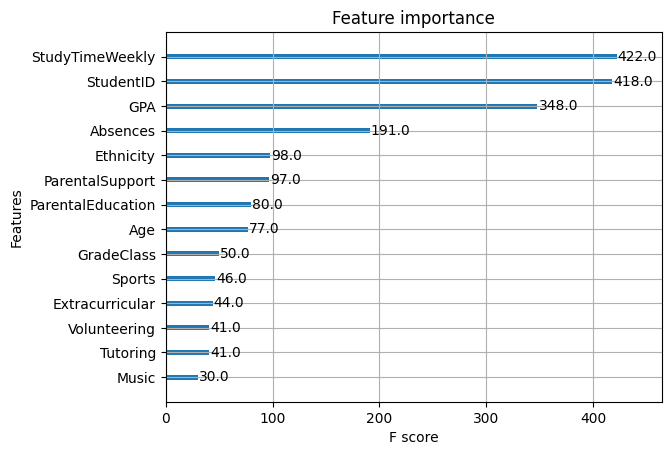

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(bst)
plt.show()